In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import re
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords  

In [ ]:
data = pd.read_excel('amazon_seaweed_snacks_product_info.xlsx')

In [ ]:
data.head()

,product name,brand,variety pack,num of flavors,flavors,feature,product description,detailed description,ingredients,Non-GMO,gluten free,vegan,allergen warnings,packing separately,nums of pack variety,pack of,calories per pack,origin,item weight,Shipping Weight,rank,sales per month
0,Ocean's Halo Seaweed Maui Onion 1 case of 12 u...,Ocean's Halo,0.0,1,"maui onion, sea salt",USDA-Certified Organic Seaweed\nOrganic Season...,Ocean’s Halo was created by Four Dads — two wh...,NaN,"ORGANIC SEAWEED, ORGANIC SUNFLOWER OIL, ORGANI...",1.0,1.0,1.0,0.0,1.0,1.0,12,20,South korea,NaN,1.12 ounces,40.0,150.0
1,Seaweed Love All Natural Roasted Seaweed Varie...,seaweed love,1.0,2,"original, olive oil",All natural;Only 25 calories and 2.5 gram of f...,All natural Roasted seaweed Snack. Our family-...,NaN,"Original Roasted Seaweed : Seaweed, Sesame Oil...",1.0,1.0,1.0,0.0,0.0,1.0,24,25,USA,60g,1.4 pounds,19.0,420.0
2,Hi Termpura (Tempura Seaweed Original) - 1.41o...,Tao Kae Noi,0.0,1,tempura seaweed original,Net weight of each pack:40g/1.41oz\nDelicious ...,Seaweed is grilld int the suitable tempurature...,NaN,"Flour, seaweed, modified tapioca starch, palm ...",0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,Thailand,40g,12.8 Ounces,17.0,480.0
3,Kwangcheonkim Kim Green Laver Seasoned Seaweed...,Kimnori,0.0,1,original,Kwangcheonkim Kim Green Laver Seasoned Seaweed...,Kimnori U.S.A. Inc.\nKimnori U.S.A. Inc. has b...,NaN,"Laver, Canola Oil, Penilla Oil, Seasoned Salt,...",1.0,1.0,1.0,0.0,1.0,0.0,27,10,South korea,135g,14.39 Ounces,14.0,540.0
4,"Annie Chun's Baked Seaweed Crisps, Gochujang F...",Annie Chun's,0.0,3,"gochujang, korean bbq, original",Vegan and Gluten-Free\nRoasted seaweed combine...,Baked Go-chu-jang Flavored Seaweed Crisps\nWe’...,NaN,"Tapioca starch, canola oil, brown rice, seawee...",1.0,1.0,1.0,0.0,0.0,0.0,1,190,South korea,1.27 ounces,1.27 ounces,13.0,540.0


In [ ]:
data.dtypes

product name             object
brand                    object
variety pack            float64
num of flavors            int64
flavors                  object
feature                  object
product description      object
detailed description     object
ingredients              object
Non-GMO                 float64
gluten free             float64
vegan                   float64
allergen warnings       float64
packing separately      float64
nums of pack variety    float64
pack of                  object
calories per pack        object
origin                   object
item weight              object
Shipping Weight          object
rank                    float64
sales per month         float64
dtype: object

In [ ]:
data['variety pack'] = data['variety pack'].astype(str)
data['Non-GMO'] = data['Non-GMO'].astype(str)
data['gluten free'] = data['gluten free'].astype(str)
data['vegan'] = data['vegan'].astype(str)
data['allergen warnings'] = data['allergen warnings'].astype(str)
data['packing separately'] = data['packing separately'].astype(str)

In [ ]:
data.dtypes

product name             object
brand                    object
variety pack             object
num of flavors            int64
flavors                  object
feature                  object
product description      object
detailed description     object
ingredients              object
Non-GMO                  object
gluten free              object
vegan                    object
allergen warnings        object
packing separately       object
nums of pack variety    float64
pack of                  object
calories per pack        object
origin                   object
item weight              object
Shipping Weight          object
rank                    float64
sales per month         float64
dtype: object

In [ ]:
data['sales per month'].describe()

count      84.000000
mean      832.023810
std      1868.640882
min         0.000000
25%        30.000000
50%       150.000000
75%       375.000000
max      7920.000000
Name: sales per month, dtype: float64

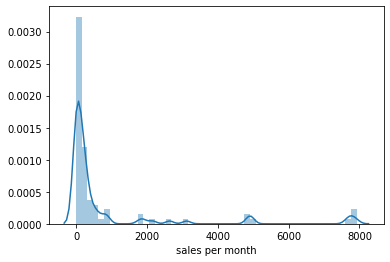

In [ ]:
sns.distplot(data['sales per month'])
plt.show()

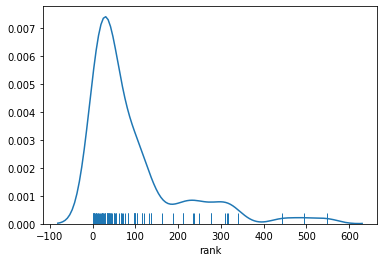

In [ ]:
sns.distplot(data['rank'], rug = True, hist = False)

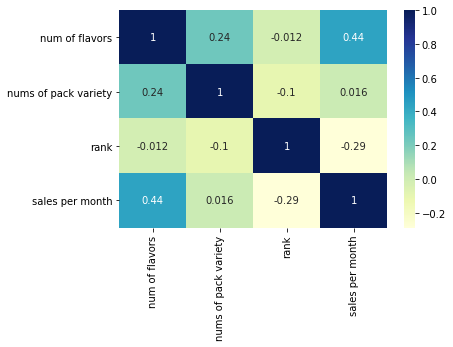

In [ ]:
sns.heatmap(data.corr(), annot= True, cmap = "YlGnBu")
plt.show()

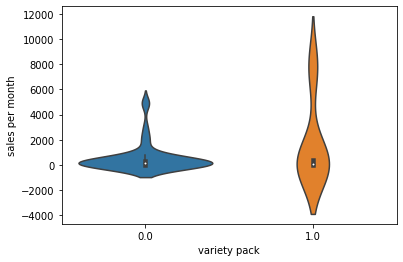

In [ ]:
df = data[~data['variety pack'].str.contains('nan')]
sns.violinplot(x="variety pack", y="sales per month", data=df)
plt.show()

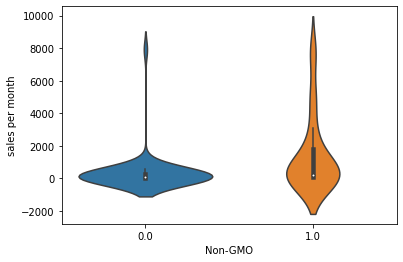

In [ ]:
df = data[~data['Non-GMO'].str.contains('nan')]
sns.violinplot(x="Non-GMO", y="sales per month", data=df)
plt.show()

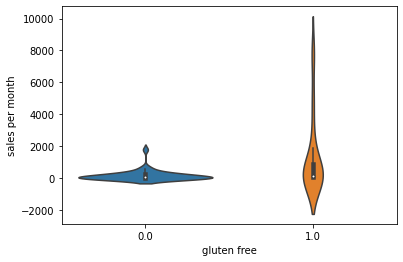

In [ ]:
df = data[~data['gluten free'].str.contains('nan')]
sns.violinplot(x="gluten free", y="sales per month", data=df)
plt.show()

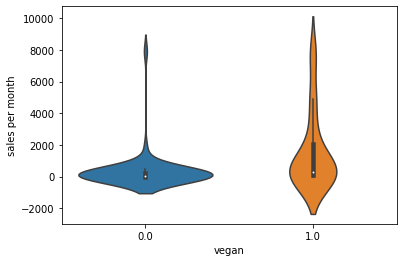

In [ ]:
df = data[~data['vegan'].str.contains('nan')]
sns.violinplot(x="vegan", y="sales per month", data=df)
plt.show()

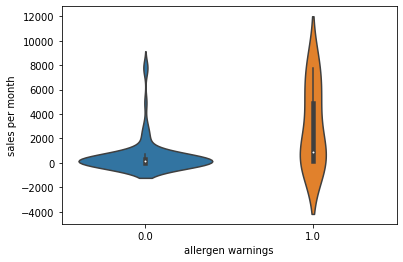

In [ ]:
df = data[~data['allergen warnings'].str.contains('nan')]
sns.violinplot(x="allergen warnings", y="sales per month", data=df)
plt.show()

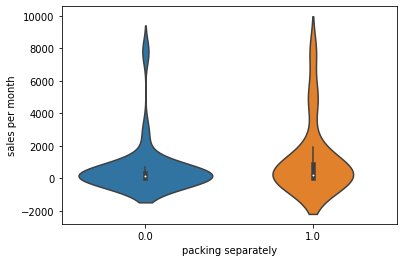

In [ ]:
df = data[~data['packing separately'].str.contains('nan')]
sns.violinplot(x="packing separately", y="sales per month", data=df)
plt.show()

In [ ]:
x = data['brand'].value_counts().index.values.astype('str')
y = data['brand'].value_counts().values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(data))]

fig = go.Figure(data=[go.Scatter(
    x=x, y=y,
    mode='markers',
    marker=dict(color = y,
        size=y*10))]) # Multiplying by 0.3 to reduce size and stay uniform accross all points

fig.update_layout(title='Number of Items by Brand',xaxis_title="Brand",yaxis_title="Count")
fig.show()

In [ ]:
df = data[data['sales per month']!=0]

x = df['sales per month'].groupby(data['brand']).mean().sort_values(ascending=False).index.values.astype('str')
y = df['sales per month'].groupby(data['brand']).mean().sort_values(ascending=False).values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(data))]

trace1 = go.Bar(x=x, y=y, text=pct, 
                marker={'color':y, 'colorscale': 'Viridis'})
layout = dict(title= 'Sales per month by Brand',
              yaxis = dict(title='Sales'),
              xaxis = dict(title='Brand'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

In [ ]:
df = data[data['num of flavors']!=0]

x = df['num of flavors'].groupby(data['brand']).max().sort_values(ascending=False).index.values.astype('str')
y = df['num of flavors'].groupby(data['brand']).max().sort_values(ascending=False).values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(data))]

trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of flavors by Brand',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Brand'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

In [ ]:
data['num of flavors'].groupby(data['brand']).max()

brand
Annie Chun's          4
Antique Alive         3
BL Gourmet            1
C-Weed                1
CJ                    0
Chenhai               0
Choi's                3
Eden Foods            0
Jayone                3
JinYang               0
KPOP Foods Store      1
Kimnori               3
Kirkland Signature    1
OMG-Oh! My Gim        4
Ocean Snack           0
Ocean's Halo          2
Ourhome               4
Pulmuone              3
Quaker                3
Sea Crunchy           3
SeaSnax               5
Shopping in Korea     4
Tao Kae Noi           1
The golden duck       1
Trader Joe's          1
Wickedly Prime        4
akua                  3
bibigo                0
choi's                1
gimMe                 6
han bugak             1
khee                  4
myungga               1
nora                  3
sahmyook              1
seaweed love          2
wang                  2
yangban               1
Name: num of flavors, dtype: int64

In [ ]:
df = data[data['nums of pack variety']>1]
df = df[df['brand']!="KPOP Foods Store"]

x = df['nums of pack variety'].groupby(data['brand']).max().sort_values(ascending=False).index.values.astype('str')
y = df['nums of pack variety'].groupby(data['brand']).max().sort_values(ascending=False).values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(data))]

trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of pack variety by Brand',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Brand'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

In [ ]:
data['nums of pack variety'].groupby(data['brand']).max()

brand
Annie Chun's          1.0
Antique Alive         2.0
BL Gourmet            0.0
C-Weed                1.0
CJ                    2.0
Chenhai               0.0
Choi's                0.0
Eden Foods            0.0
Jayone                2.0
JinYang               0.0
KPOP Foods Store      0.0
Kimnori               0.0
Kirkland Signature    3.0
OMG-Oh! My Gim        1.0
Ocean Snack           0.0
Ocean's Halo          5.0
Ourhome               0.0
Pulmuone              0.0
Quaker                0.0
Sea Crunchy           3.0
SeaSnax               3.0
Shopping in Korea     1.0
Tao Kae Noi           0.0
The golden duck       0.0
Trader Joe's          2.0
Wickedly Prime        0.0
akua                  1.0
bibigo                0.0
choi's                0.0
gimMe                 1.0
han bugak             0.0
khee                  0.0
myungga               0.0
nora                  1.0
sahmyook              0.0
seaweed love          1.0
wang                  0.0
yangban               0.0
Name: 

In [ ]:
df = data[~data['origin'].isnull()]

x = df['origin'].value_counts().index.values.astype('str')
y = df['origin'].value_counts().values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(data))]

trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Number of pack variety by Origin',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Category'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

In [ ]:
df = data

desc_len = []
for t in df['feature']:
    is_english = re.compile('[-a-zA-Z]')
    words = is_english.findall(t)
    print(words)
    words = [w for w in words.split(" ") if len(w)>3]
    desc_len.append(len(words))

['U', 'S', 'D', 'A', '-', 'C', 'e', 'r', 't', 'i', 'f', 'i', 'e', 'd', 'O', 'r', 'g', 'a', 'n', 'i', 'c', 'S', 'e', 'a', 'w', 'e', 'e', 'd', 'O', 'r', 'g', 'a', 'n', 'i', 'c', 'S', 'e', 'a', 's', 'o', 'n', 'i', 'n', 'g', 'c', 'a', 'l', 'o', 'r', 'i', 'e', 's', 'p', 'e', 'r', 's', 'e', 'r', 'v', 'i', 'n', 'g', 'H', 'i', 'g', 'h', 'i', 'n', 'V', 'i', 't', 'a', 'm', 'i', 'n', 'B', '-', 'a', 'n', 'd', 'I', 'o', 'd', 'i', 'n', 'e', 'N', 'o', 'n', '-', 'G', 'M', 'O', 'C', 'e', 'r', 't', 'i', 'f', 'i', 'e', 'd', 'V', 'e', 'g', 'a', 'n', 'K', 'o', 's', 'h', 'e', 'r']


AttributeError: ignored

In [ ]:
len(desc_len)

90

In [ ]:
desc_len = df['desc_len']

In [ ]:
feature = df.groupby('desc_len')['sales per month'].mean().reset_index()

In [ ]:
fig = go.Figure(data=go.Scatter(x= df['desc_len'], y=df['sales per month'], mode='markers'))
fig.show()

In [ ]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# apply the tokenizer into the item descriptipn column

df['tokens'] = df['product description'].map(tokenize)